<font size=5 color='navy'><center>**Motivation**
    
    Many clustering method like K-means are based on euclidean distance, but euclidean distance can not capture the compositional difference.  
    
    On the other hand, cosine distance can accout for directional difference.

## read data

In [95]:
import os,sys,re
import pandas as pd
import numpy as np
from importlib import reload
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from src import PATH, utils,my_metrics
from src import leukocyte_cluster as LEUC

from sklearn import metrics
from sklearn.cluster import AffinityPropagation,AgglomerativeClustering,KMeans,MeanShift,DBSCAN
from sklearn.preprocessing import StandardScaler, Normalizer

In [2]:
## this is path 2 ..
ALL = utils.read_leukocyte(PATH.leukocyte_path)
print(ALL.shape)
ALL.head(1)

(3149, 23)


,id,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
0,TCGA-05-4249-01A-01R-1107-07,0.002131,0.023685,0.079791,0.030423,0.0,0.097957,0.0,0.034192,0.029121,...,0.010681,0.009018,0.038816,0.116087,0.351658,0.007345,0.139602,0.0,0.0,0.023269


In [3]:
tsne_path="/home/wergillius/Project/pan-cancer-leukocyte/leukocyte/t_sne/ALL_tsne_p30.csv"
tsne_1 = pd.read_csv(tsne_path)
print(tsne_1.shape)
tsne_1.head(2)

(3136, 6)


,id,axis0,axis1,ac,km,cancer_type
0,TCGA-05-4249-01A-01R-1107-07,-48.048270,20.494755,0,1,NSCLC
1,TCGA-05-4250-01A-01R-1107-07,0.378064,16.299036,2,1,NSCLC


In [6]:
DF_filtered, statistics=LEUC.statistics_preprocess(ALL,False)

DF_filtered = DF_filtered.merge(tsne_1,left_on=['id'],right_on=['id'])

print(DF_filtered.shape)
DF_filtered.head(3)

(3136, 26)


,id,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Neutrophils,axis0,axis1,ac,km,cancer_type
0,TCGA-05-4249-01A-01R-1107-07,0.002131,0.023685,0.079791,0.030423,0.097957,0.000000,0.034192,0.029121,0.000000,...,0.351658,0.007345,0.139602,0.0,0.023269,-48.048270,20.494755,0,1,NSCLC
1,TCGA-05-4250-01A-01R-1107-07,0.019897,0.000000,0.028132,0.121202,0.153461,0.060040,0.054603,0.000000,0.001783,...,0.042287,0.000000,0.070442,0.0,0.010245,0.378064,16.299036,2,1,NSCLC
2,TCGA-05-4382-01A-01R-1206-07,0.000000,0.000000,0.144794,0.038011,0.141085,0.015311,0.001384,0.027211,0.000000,...,0.003916,0.000000,0.014265,0.0,0.025810,-52.349854,-23.976130,1,4,NSCLC


In [60]:
data = DF_filtered.iloc[:,1:-7].values
n_data = Normalizer().fit_transform(data)
sc_data = StandardScaler().fit_transform(data)

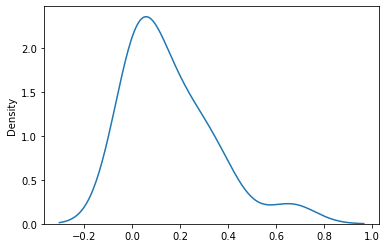

In [104]:
sns.kdeplot(n_data[4,:]);

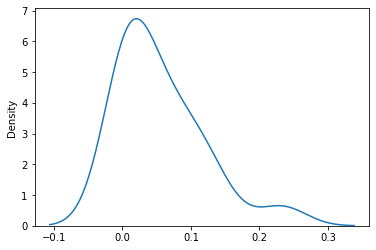

In [105]:
sns.kdeplot(data[4,:]);

In [15]:
tsne = DF_filtered.loc[:,['axis0','axis1']].values

## method that support cosine distance

In [11]:
cosDist_M=metrics.pairwise_distances(data,metric='cosine')

In [110]:
cosDist_M=metrics.pairwise_distances(sc_data,metric='cosine')

In [106]:
eucDist_M=metrics.pairwise_distances(data,metric='euclidean')

<AxesSubplot:ylabel='Density'>

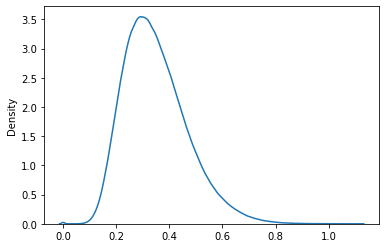

In [108]:
sns.kdeplot(eucDist_M.flatten())

<AxesSubplot:ylabel='Density'>

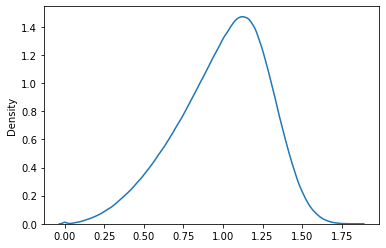

In [111]:
sns.kdeplot(cosDist_M.flatten())

### AffinityPropagation

In [146]:
AP = AffinityPropagation(damping=0.98,max_iter=400,convergence_iter=30,affinity='precomputed')
AP.fit(cosDist_M)

/home/wergillius/.conda/envs/ZwZ/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


AffinityPropagation(affinity='precomputed', convergence_iter=30, damping=0.98,
                    max_iter=400)

In [147]:
np.unique(AP.labels_)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142])

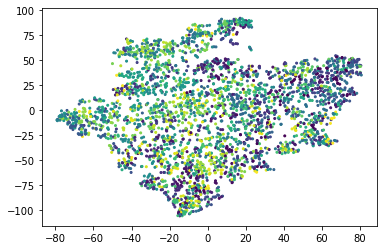

In [148]:
plt.scatter(tsne[:,0],tsne[:,1],c=AP.labels_,s=4);

### MeanShift

In [41]:
MS = MeanShift(n_jobs=8,min_bin_freq=100)
MS.fit(data)

MeanShift(min_bin_freq=100, n_jobs=8)

In [42]:
np.unique(MS.labels_)

array([0, 1])

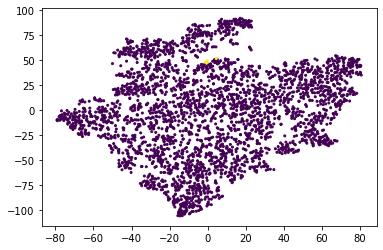

In [43]:
plt.scatter(tsne[:,0],tsne[:,1],c=MS.labels_,s=4);

### DBSCAN

In [144]:
DB_cos=DBSCAN(eps=0.3,min_samples=2,metric='cosine').fit(data)

In [145]:
np.unique(DB_cos.labels_)

array([0])

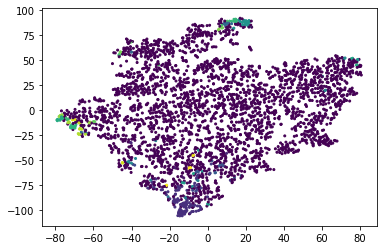

In [143]:
plt.scatter(tsne[:,0],tsne[:,1],c=DB_cos.labels_,s=4);